In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 

In [2]:
crypto_df = pd.read_csv("crypto_data.csv")
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
crypto_df = crypto_df.drop('Unnamed: 0', axis= 1)
crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [7]:
trading_df = crypto_df.loc[crypto_df['IsTrading'] == True]
trading_df = trading_df.drop(['IsTrading'], axis= 1)
trading_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365Coin,X11,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,PoW,NaN,611000
4,808,SHA-256,PoW/PoS,0.000000e+00,0


In [8]:
trading_df= trading_df.dropna()
trading_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [12]:
trading_df = trading_df.drop('CoinName', axis= 1)
trading_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
4,SHA-256,PoW/PoS,0.000000e+00,0
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000


In [14]:
dummy_df = pd.get_dummies(trading_df, drop_first= True)
dummy_df.head()

,TotalCoinsMined,Algorithm_536,Algorithm_Argon2,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,TotalCoinSupply_92000000000,TotalCoinSupply_92233720000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,4.199995e+01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000000e+00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dummy_df)

In [20]:
pca = PCA(n_components= .90)
pca_info = pca.fit_transform(scaled_data)
pca_info.shape

(685, 331)

In [22]:
tsne = TSNE(learning_rate= 250)
tsne_info= tsne.fit_transform(pca_info)
tsne_info.shape

/Users/jassjones/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(685, 2)

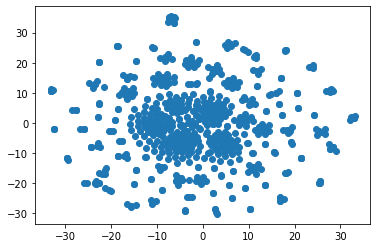

In [25]:
plt.scatter(tsne_info[:, 0], tsne_info[:, 1])
plt.show()

In [26]:
inertia = []
k = list(range(1, 11))

for i in k:
    k_means = KMeans(n_clusters= i, random_state= 0)
    k_means.fit(tsne_info)
    inertia.append(k_means.inertia_)

elbow = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow)
elbow_df.head()


,k,inertia
0,1,257316.703125
1,2,174254.156250
2,3,115167.218750
3,4,91275.671875
4,5,74102.171875


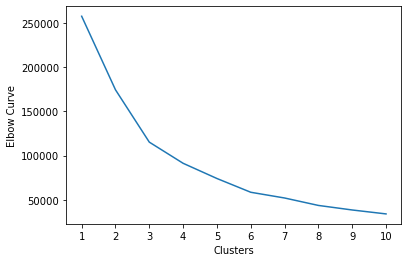

In [28]:
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1, 11))
plt.xlabel('Clusters')
plt.ylabel('Elbow Curve')
plt.show()

Observing the graphs above, after reducing the data significantly, there apoears to be 5 large visable clusters the crysto data can be placed into.